# Evaluación Model 1.0.0.35

In [28]:
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model
import numpy as np

In [29]:
# Cargar el modelo guardado
model = load_model('weights/model_1.0.0.35_complete.keras')
test_dir = '/Users/julio/Documentos-Local/data/VinDr-Mammo/subsets/ss1/test'

/Users/julio/Documents/PMM/Codigos/Test1/Classification/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 30 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [31]:
# Cargar el dataset de prueba
normalized_test_dataset = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(299, 299),
    color_mode='grayscale'
)


# Normalizar los valores de las imágenes
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalización a valores entre 0 y 1
    return image, label

normalized_test_dataset = normalized_test_dataset.map(normalize)

Found 192 files belonging to 2 classes.


In [32]:
# Ver el tamaño y algunas imágenes del dataset de prueba
#print(normalized_test_dataset.class_names)
for image_batch, label_batch in normalized_test_dataset.take(1):
    print("Tamaño del lote:", image_batch.shape)
    print("Etiquetas:", label_batch.numpy())

Tamaño del lote: (32, 299, 299, 1)
Etiquetas: [[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


2024-09-13 01:35:39.351815: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Predicciones

In [33]:
steps = len(normalized_test_dataset)

# Realizar las predicciones especificando el número de pasos
y_pred = model.predict(normalized_test_dataset, steps=steps)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas
y_true = np.concatenate([y for x, y in normalized_test_dataset], axis=0)  # Obtener las clases verdaderas

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


### Confusion Matrix

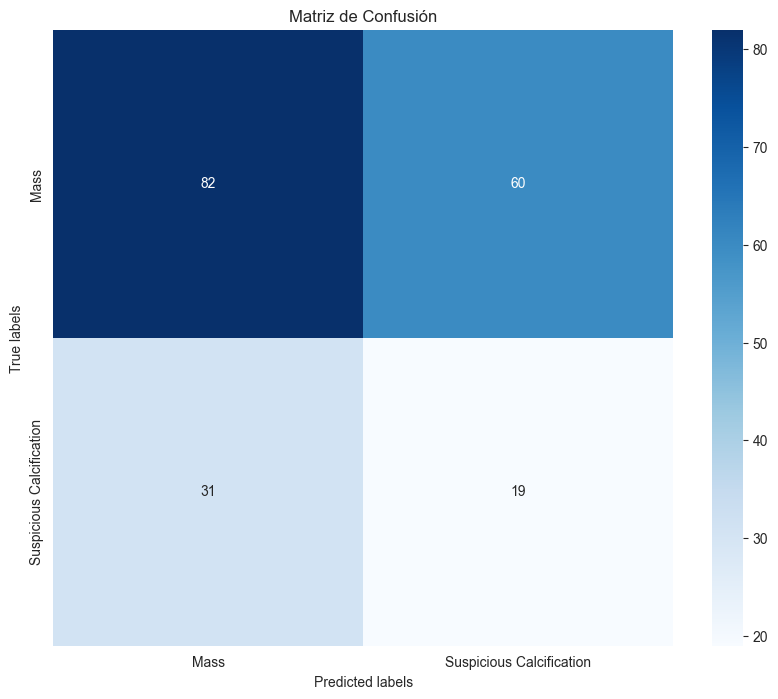

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
# Etiquetas de las clases
class_names = ['Mass', 'Suspicious Calcification']

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')
plt.show()

In [9]:
# Function to pretty print the confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
Normalized confusion matrix


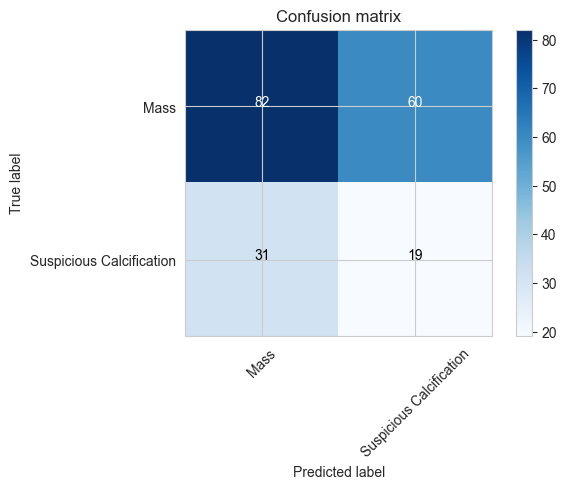

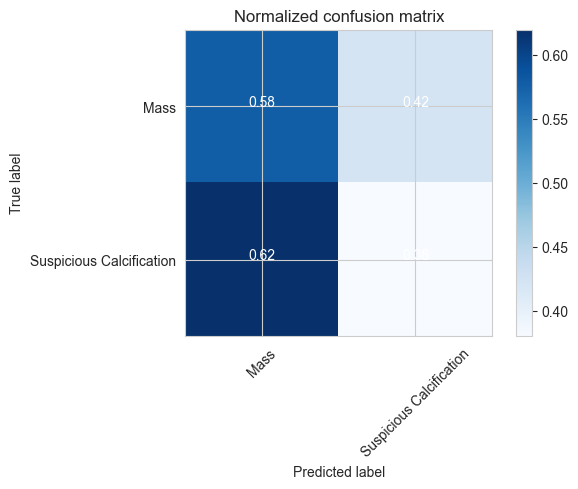

In [10]:
plt.subplots()
plot_confusion_matrix(conf_matrix, class_names)
plt.subplots()
plot_confusion_matrix(conf_matrix, class_names, normalize=True, title='Normalized confusion matrix')

## Métricas

In [11]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=['Mass', 'Suspicious Calcification'])
print(report)

                          precision    recall  f1-score   support

                    Mass       0.73      0.58      0.64       142
Suspicious Calcification       0.24      0.38      0.29        50

                accuracy                           0.53       192
               macro avg       0.48      0.48      0.47       192
            weighted avg       0.60      0.53      0.55       192



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


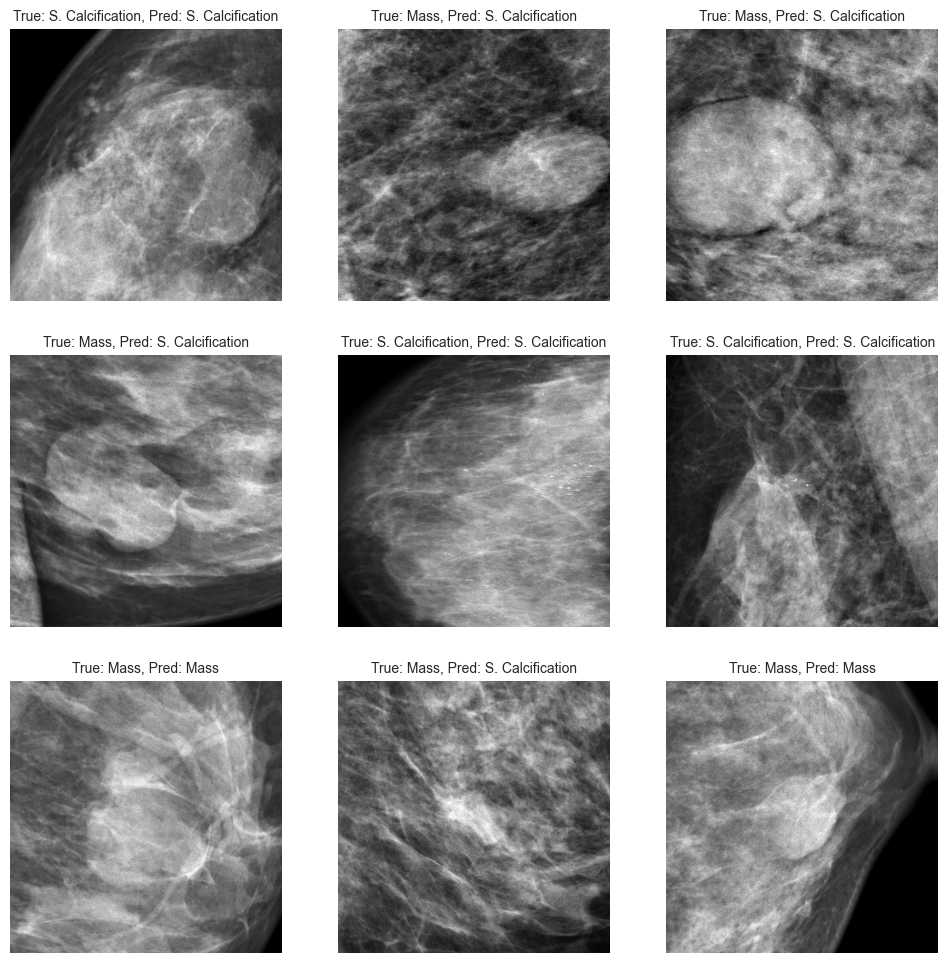

In [24]:
import matplotlib.pyplot as plt

# Definir los nombres reales de las clases
class_names = ['Mass', 'S. Calcification']

# Obtener algunas imágenes del conjunto de prueba
images, labels = next(iter(normalized_test_dataset))
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar algunas imágenes con sus predicciones
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    
    # Convertir la imagen y las etiquetas a NumPy
    img = images[i].numpy().reshape(299, 299)  # Ajustar según la forma de las imágenes
    true_label = class_names[int(labels[i].numpy()[0])]  # Si las etiquetas están en formato entero
    pred_label = class_names[predicted_classes[i]]  # Obtener el nombre de la clase predicha

    # Mostrar la imagen
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}", size=10)
    plt.axis('off')

plt.show()

In [16]:
# Imprimir las etiquetas para verificar el formato
print(labels.numpy())

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## PCA

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 150, 150, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (ReLU)                    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1.1 (Conv2D)                │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1.1 (BatchNormalization)      │ (None, 150, 150, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1.1 (ReLU)                  │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1.2 (Conv2D)                │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1.2 (BatchNormalization)      │ (None, 150, 150, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1.2 (ReLU)                  │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2.1 (Conv2D)                │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2.1 (BatchNormalization)      │ (None, 75, 75, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2.1 (ReLU)                  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2.2 (Conv2D)                │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2.2 (BatchNormalization)      │ (None, 75, 75, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2.2 (ReLU)                  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3.1 (Conv2D)                │ (None, 38, 38, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3.1 (BatchNormalization)      │ (None, 38, 38, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3.1 (ReLU)                  │ (None, 38, 38, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3.2 (Conv2D)                │ (None, 38, 38, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3.2 (BatchNormalization)      │ (None, 38, 38, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3.2 (ReLU)                  │ (None, 38, 38, 128)    │             

 Total params: 62,636,870 (238.94 MB)

 Trainable params: 30,427,586 (116.07 MB)

 Non-trainable params: 1,781,696 (6.80 MB)

 Optimizer params: 30,427,588 (116.07 MB)

In [39]:
from tensorflow.keras.models import Model

# Obtener la capa flatten
encoder_output = model.get_layer('flatten').output
# Crear modelo solo hata la capa flatten
encoder_model = Model(inputs=model.input, outputs=encoder_output)
# Representación del espacio latente
latent_representations = encoder_model.predict(normalized_test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


ValueError: The layer sequential has never been called and thus has no defined input.

In [26]:
from sklearn.decomposition import PCA
# Aplicar PCA
pca = PCA(n_components=2)  # O el número de componentes que desees
pca_result = pca.fit_transform(latent_representations)

NameError: name 'latent_representations' is not defined